In [34]:
# libraries

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium
import plotly.graph_objects as go
import seaborn as sns
import ipywidgets as widgets

In [35]:
display(HTML("<div style = 'background-color:#000000; padding: 30px '>" +
             "<span style='color: white; font-size:30px;margin-left:500px; font-weight: bolder;align-items: center;'> COVID-19 DATA DASHBOARD" +"</span>"
            "</div>") 
       )
       

# 

# 



# <centre>"Ultimately, the greatest lesson that COVID-19 can teach humanity is that we are all in this together."-Kiran Mazumdar-Shaw.</centre>


#### <centre> SARS stands for the severe acute respiratory syndrome. In 2003, an outbreak of SARS affected people in several countries before ending in 2004. The coronavirus that causes COVID-19 is similar to the one that caused the 2003 SARS outbreak. Since the 2019 coronavirus is related to the original coronavirus that caused SARS and can also cause the severe acute respiratory syndrome, there is “SARS” in its name: SARS-CoV-2. Much is still unknown about these viruses, but SARS-CoV-2 spreads faster and farther than the 2003 SARS-CoV-1 virus. This is likely because of how easy it is transmitted from person to person, even from asymptomatic carriers of the virus. Coronaviruses are a large family of viruses that cause illnesses ranging from the common cold to more severe diseases. A novel coronavirus is a new strain that has not been previously identified in humans. The new virus was subsequently named the “COVID-19 virus”.The coronavirus COVID-19 pandemic is the defining global health crisis of our time and the greatest challenge we have faced till now. Since its emergence in Asia in 2019, the virus has spread to every continent except Antarctica.</centre>

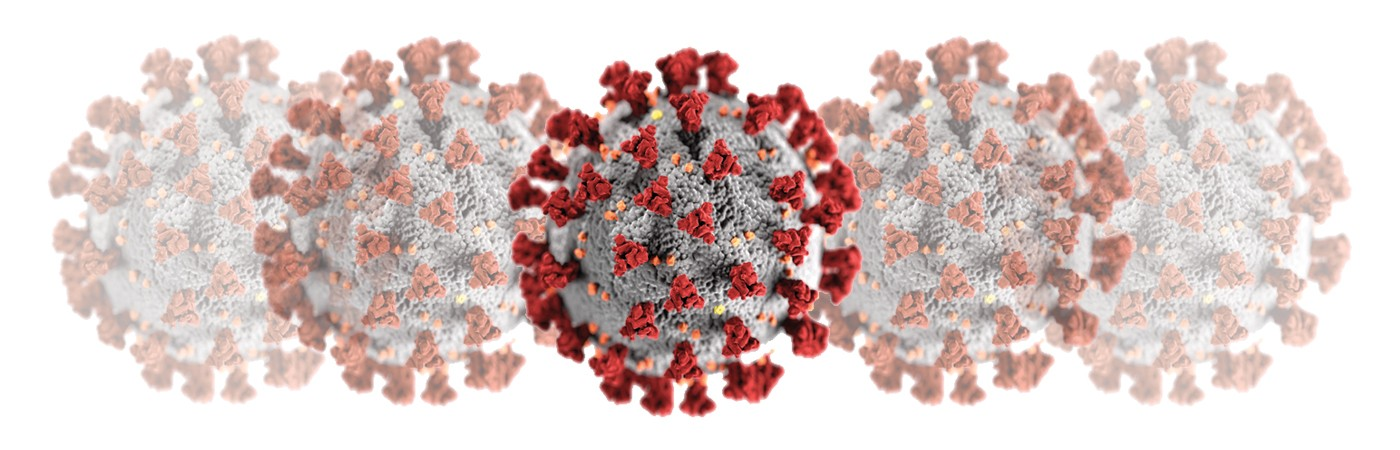

In [3]:
# libraries

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium
import plotly.graph_objects as go
import seaborn as sns
import ipywidgets as widgets

In [4]:
# Data loading from github repository of jhon hopkins
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
country_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

In [5]:
# death_df.drop('Lat',axis='columns', inplace=True)
# death_df.drop('Long',axis='columns', inplace=True)
# death_df.drop('Province/State',axis='columns', inplace=True)
# country_df.drop('Lat',axis='columns', inplace=True)
# country_df.drop('Long_',axis='columns', inplace=True)

In [6]:
# Data cleaning

# renaming the df column names to lowercase
country_df.columns = map(str.lower, country_df.columns)
confirmed_df.columns = map(str.lower, confirmed_df.columns)
death_df.columns = map(str.lower, death_df.columns)
recovered_df.columns = map(str.lower, recovered_df.columns)

In [7]:
# changing province/state to state and country/region to country
country_df = country_df.rename(columns={'country_region': 'country'})
country_df = country_df[['country','last_update','confirmed','deaths','recovered','active']]
confirmed_df = confirmed_df.rename(columns={'province/state': 'STATE', 'country/region': 'country'})
death_df = death_df.rename(columns={'province/state': 'STATE', 'country/region': 'country'})
recovered_df = confirmed_df.rename(columns={'province/state': 'STATE', 'country/region': 'country'})

# delete state as it contains nan value and it will cause problem while plotting map

# confirmed_df.drop('state', axis=1 ,inplace=True)




In [8]:
# Total number of confirmed, death and recovered cases
confirmed_total = int(country_df['confirmed'].sum())
deaths_total = int(country_df['deaths'].sum())
recovered_total = int(country_df['recovered'].sum())
active_total = int(country_df['active'].sum())

# 


In [9]:

display(HTML("<div style = 'background-color:#353935; padding: 20px '>" +
             "<span style='color: white; font-size:30px;margin-left:600px; align-items: center;'> COVID-19 DATA " +"</span>"
            "</div>") 
       )
       



## DATA OF THE TOP AFFECTED COUNTRY


In [10]:
from IPython.display import display, HTML

CSS = """
.output {
    align-items: center;
    div.output_area {
    width: 30%;
}
}

"""

HTML('<style>{}</style>'.format(CSS))

# 

In [11]:

fig = go.FigureWidget( layout=go.Layout() )
def highlight_col(x):
    r = 'background-color:  coral'
    y = 'background-color: lightblue'
    g = 'background-color: lightgreen'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[:, 2] = y
    df1.iloc[:, 3] = r
    df1.iloc[:, 4] = g
    
    return df1

def show_latest_cases(Number):
    Number= int(Number)
    return country_df.sort_values('confirmed', ascending= False).head(Number).style.apply(highlight_col, axis=None)

interact(show_latest_cases, Number='10')

ipywLayout = widgets.Layout(border='solid 2px green')

ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)


interactive(children=(Text(value='10', description='Number'), Output()), _dom_classes=('widget-interact',))

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

# 

In [12]:
sorted_country_df = country_df.sort_values('confirmed', ascending= False).head(10)
import plotly.io as plt_io
import plotly.express as px
plt_io.templates["Gapminder 2007"] = plt_io.templates["plotly_white"]





## TOP 5 MOST AFFECTED COUNTRY.

# 

In [13]:
import plotly.express as px 


    
fig = px.scatter(sorted_country_df.head(10), x="country", y="confirmed", size="confirmed", color="country",
          hover_name="country", size_max=70)
#  update done according to us

fig.update_layout(
    title=str(5) +" Worst hit countries",
    xaxis_title="Countries",
    yaxis_title="Confirmed Cases",
    width = 1000
    )
fig.layout.template = 'Gapminder 2007'
   
fig.show()


# 

# <center>FACT ABOUT COVID-19:</center>
#### <center>*Covid-19 cannot be transmitted through mosquitoes.</center>
#### <center>*Drinking alcohol, such as beer, liquor, wine doesn’t help prevent coronavirus</center>
#### <center>*COVID-19 virus can spread in cold as well as hot climate. Virus has nothing to do with climate.</center>
#### <center>*Spraying alcohol or chlorine on your body donnot kill the virus inside.</center>
#### <center>*Rinsing the nose with saline cannot protect against the coronavirus</center>
#### <center>*The virus donnot die when temperatures rise</center>


# 

# 



# <center>10 WORST HIT COUNTRY.</center>


# 

# 


##  Confirm Cases.

In [14]:
sorted_country_df = country_df.sort_values('confirmed', ascending= False).head(10)
import plotly.io as plt_io
import plotly.express as px
plt_io.templates["Mt Bruno Elevation"] = plt_io.templates["simple_white"]



In [15]:
object_fit = 'none'
fig=px.bar(
    sorted_country_df.head(10),
    x = "country",
    y = "confirmed",
#     title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["Blue"], 
    height=500,
    width=600
)
fig.layout.template = 'Mt Bruno Elevation'
fig.show()
 


 ## Death Cases.

In [16]:

fig=px.bar(
    sorted_country_df.head(10),
    x = "country",
    y = "deaths",
#     title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["red"], 
    height=500,
    width=600
   
)
fig.layout.template = 'Mt Bruno Elevation'
fig.show()


# Recovered Cases.

In [17]:
fig=px.bar(
    sorted_country_df.head(10),
    x = "country",
    y = "recovered",
#     title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["green"], 
    height=500,
    width=600
)
fig.layout.template = 'Mt Bruno Elevation'
fig.update_layout(height=400, margin={"r":100,"t":0,"l":100,"b":0})
fig.show()


# DEATH V/S CONFIRMED CASES 

## ENTER THE NAME OF THE COUNTRY (Example:India)

In [18]:
import plotly.graph_objects as go

In [19]:
def plot_cases_of_a_country(country):
    labels = ['confirmed', 'deaths']
    colors = ['blue', 'red']
    mode_size = [6, 8]
    line_size = [4, 5]
    
    df_list = [confirmed_df, death_df]
    
    fig = go.Figure();
    
    for i, df in enumerate(df_list):
        if country == 'World' or country == 'world':
            x_data = np.array(list(df.iloc[:, 5:].columns))
            y_data = np.sum(np.asarray(df.iloc[:,5:]),axis = 0)
            
        else:    
            x_data = np.array(list(df.iloc[:, 5:].columns))
            y_data = np.sum(np.asarray(df[df['country'] == country].iloc[:,20:]),axis = 0)
            
        fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='lines+markers',
            name=labels[i],
            line=dict(color=colors[i], width=line_size[i]),
            connectgaps=True,
            text = "Total " + str(labels[i]) +": "+ str(y_data[-1])
             ))  
        
    fig.update_layout(
        title="COVID 19 cases of " + country,
        xaxis_title='Date',
        yaxis_title='No. of Confirmed Cases',
        margin=dict(l=20, r=20, t=40, b=20),
        paper_bgcolor="white",
        width = 800,
        plot_bgcolor='white'
    )
    
         
    fig.show()
interact(plot_cases_of_a_country, country='World')
        
   
#     plot_cases_of_a_country('US')
   
     
        

interactive(children=(Text(value='World', description='country'), Output()), _dom_classes=('widget-interact',)…

<function __main__.plot_cases_of_a_country(country)>

# 

# 

# 


In [20]:
display(HTML("<div style = 'background-color:#353935; padding: 30px '>"  + 
               "<span style='color: white; font-size:30px;margin-left:100px;font-weight: bolder;'> Confirmed: "  + str(confirmed_total) +"</span>" +
               "<span style='color: white; font-size:30px;margin-left:100px;font-weight: bolder;'> Deaths: " + str(deaths_total) + "</span>" +
                "<span style='color: white; font-size:30px; margin-left:100px;font-weight: bolder;'> Recovered: " + str(recovered_total) + "</span>"+
               "</div>" )
         )


# <center>FACTS ABOUT COVID-19 VACCINES:</center>

### <center>*If one have already been infected with COVID-19 in the past,still they should and can be vaccinated.</center>
### <center>*Researchers did not rush the development of COVID-19 vaccine,so it is effective as well as trustworthy.</center>
### <center>*Individuals who get the COVID-19 vaccination still need to practice infection prevention precautions</center>
### <center>*The side effects of the COVID-19 vaccine are not dangerous.</center>




In [21]:
vaccination_df = pd.read_csv('https://covid19.who.int/who-data/vaccination-data.csv')

In [22]:

vaccination_df.drop('ISO3',axis='columns', inplace=True)
vaccination_df.drop('WHO_REGION',axis='columns', inplace=True)
vaccination_df.drop('DATA_SOURCE',axis='columns', inplace=True)
vaccination_df.drop('NUMBER_VACCINES_TYPES_USED',axis='columns', inplace=True)
vaccination_df.drop('TOTAL_VACCINATIONS_PER100',axis='columns', inplace=True)
vaccination_df.drop('PERSONS_VACCINATED_1PLUS_DOSE_PER100',axis='columns', inplace=True)
# vaccination_df.drop('VACCINES_USED',axis='columns', inplace=True)

In [23]:

vaccination_df=vaccination_df.rename(columns={'PERSONS_VACCINATED_1PLUS_DOSE':'DOSE1_VACCINATION'})
vaccination_df=vaccination_df[['COUNTRY','DATE_UPDATED','TOTAL_VACCINATIONS','DOSE1_VACCINATION','FIRST_VACCINE_DATE','VACCINES_USED']]

# conver nan and NaN values

In [24]:
vac_total = (vaccination_df['TOTAL_VACCINATIONS'].sum())
vac2_total= (vaccination_df['DOSE1_VACCINATION'].sum())


# 


# 

# 

In [25]:


display(HTML("<div style = 'background-color:#353935; padding: 20px '>" +
             "<span style='color:white; font-size:30px;margin-left:600px;align-items: center;font-weight: bolder;'> VACCINATION DATA. " +"</span>"
            "</div>") 
       )




# 


# 

## DATA OF THE TOP AFFECTED COUNTRY


In [26]:
vaccination_df['TOTAL_VACCINATIONS'] =vaccination_df['TOTAL_VACCINATIONS'].replace(np.nan, 0)
vaccination_df['DOSE1_VACCINATION'] =vaccination_df['DOSE1_VACCINATION'].fillna(0)
vaccination_df['FIRST_VACCINE_DATE'] =vaccination_df['FIRST_VACCINE_DATE'].fillna(0)


# convert into million
vaccination_df['TOTAL_VACCINATIONS']=(vaccination_df['TOTAL_VACCINATIONS'].astype(float)/1000000)
vaccination_df['DOSE1_VACCINATION']=(vaccination_df['DOSE1_VACCINATION'].astype(float)/1000000).round(2).astype(str) + 'M'



def show_latest_cases(Number):
    Number= int(Number)
    return vaccination_df.sort_values('TOTAL_VACCINATIONS', ascending= False).head(Number)

vaccination1_df=vaccination_df.sort_values('TOTAL_VACCINATIONS', ascending= False).head(10)

interact(show_latest_cases, Number='10')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
# widgets.VBox([fig], layout=ipywLayout)


interactive(children=(Text(value='10', description='Number'), Output()), _dom_classes=('widget-interact',))

## TOP 10 COUNTRY WITH MAXIMUM VACCINATION 

In [27]:
fig = px.scatter(vaccination1_df,x="COUNTRY", y="TOTAL_VACCINATIONS", size="TOTAL_VACCINATIONS", color="COUNTRY",
               hover_name="COUNTRY", size_max=60)
    
fig.update_layout(
    xaxis_title="Countries",
    yaxis_title="VACCINATION DONE",
    width = 1000
    )

fig.layout.template = 'Gapminder 2007'

fig.show()


# <center>VACCINATION GUIDLINE:</center>


## <center>DO'S</center>
#### <center>*Register and schedule your vaccination in advance</center>
#### <center>*Register online through Co-WIN OR Aarogya Setu OR UMANG platform</center>
#### <center>*Register against only one phone number and one proof of ID</center>
#### <center>*Carry ID proof when you go for vaccination</center>
#### <center>*Search for nearest vaccination centre online  and select centre convenient for vaccination</center>
#### <center>*Inform Helpline Number: +91-11-23978046 (Toll free-1075) in case of any side effect after leaving centre</center>
#### <center>*Reach Vaccination Centre on the specified date and time</center>
#### <center>*Wait for 30 minutes at the vaccination centre after vaccination</center>
#### <center>*Continue precautions of social distancing and wearing masks</center>


## <center>DONT'S</center>
#### <center>*One-person register in multiple platforms</center>
#### <center>*Consume alcohol or other intoxicants on the day of vaccination</center>
#### <center>*Donnot Register again for second dose</center>








.

In [28]:
display(HTML("<div style = 'background-color:#353935; padding: 30px '>" +
             "<span style='color: white; font-size:30px;margin-left:180px; font-weight: bolder;'> Total Vaccination: "  + str(vac_total) +"</span>" + 
             "<span style='color: white; font-size:30px; margin-left:90px; font-weight: bolder;'> Dose1 Vaccination: " + str(vac2_total) + "</span>"+
             "</div>")
       )

In [29]:
from IPython.display import display, HTML

CSS = """
.output {
    align-items:stretch ;
   
}
}
"""

HTML('<style>{}</style>'.format(CSS))


In [30]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmed_df = confirmed_df.rename(columns={'Province/State':'state','Country/Region':'country'})

confirmed_df.Lat = confirmed_df.Lat.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
confirmed_df.Long = confirmed_df.Long.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
confirmed_df.Lat=confirmed_df.Lat.fillna(0)
confirmed_df.Long=confirmed_df.Long.fillna(0)


In [31]:
world_map = folium.Map(location=[20,0], tiles="Stamen Terrain", zoom_start=2)
# confirmed_df.dropna(subset=['lat'],inplace=True)
# confirmed_df.dropna(subset=['long'],inplace=True)

for i in range(0,len(confirmed_df)):
    folium.Marker( 
    location=[confirmed_df.iloc[i]['Lat'], confirmed_df.iloc[i]['Long']],
#     fill=True,
#     radius= (int((np.log(confirmed_df.iloc[i,-1]+1.00001))) + 0.2)*50000,
#     fill_color='white' ,
#     color='red',
    tooltip= "<div style='margin: 0; background-color: black; color: white;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+confirmed_df.iloc[i]['country'] + "</h4>"
                    "<hr style='margin:10px;color: white;'>"+
                    "<ul style='color: white;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li>Confirmed: "+str(confirmed_df.iloc[i,-1])+"</li>"+
                        "<li>Deaths:   "+str(death_df.iloc[i,-1])+"</li>"+
                        "<li>Death Rate: "+ str(np.round(death_df.iloc[i,-1]/(confirmed_df.iloc[i,-1]+1.00001)*100,2))+ "</li>"+
                    "</ul></div>",
    ).add_to(world_map)
world_map

In [32]:


display(HTML("<div style = 'background-color:#353935; padding: 10px '>" +
             "<span style='color:white; font-size:30px;margin-left:600px;align-items: center;font-weight: bolder;'> WORLD MAP " +"</span>"
            "</div>") 
       )


# 

# 


# <center>SYMPTOMS:</center>

## <center>Most common symptoms: </center>
#### <center>*Fever </center>
#### <center>*Dry cough </center>
#### <center>*Tiredness </center>



## <center>Less common symptoms:</center>
#### <center>*Aches and pains</center>
#### <center>*Sore throat</center>
#### <center>*Diarrhoea</center>
#### <center>*A rash on skin, or discolouration of fingers or toe</center>
#### <center>*Conjunctivitis</center>
#### <center>*Headache</center>
#### <center>*Loss of taste or smell</center>


 


## <center>PREVENTION TIPS:</center>


#### <center>*Avoid crowd or large gathering of people</center>
#### <center>*Don’t touch your face, eyes, nose, or mouth when your hands are dirty.</center>
#### <center>*Clean any objects you touch a lot. Use disinfectants on objects like phones, doors, and doorknobs etc.</center>
#### <center>*Cover your mouth with a tissue or the inside of your elbow whenever you sneeze or cough.</center>
#### <center>*Don’t go out if you’re feeling sick or have any cold or flu symptoms.</center>
#### <center>*Wear a mask or face covering in public places</center>





# 

# 

# 

In [36]:

display(HTML("<div style = 'background-color:#000000; padding: 30px '>" +
             "<span style='color: white; font-size:30px;margin-left:500px; font-weight: bolder;align-items: center;'> !!TOGETHER WE WILL OVERCOME!!" +"</span>"
            "</div>") 
       )